In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [3]:
d1 = pd.read_csv('/content/drive/My Drive/Location_Clean.csv', encoding="iso-8859-1" )

In [4]:
d1

,Unnamed: 0,Unnamed: 0.1,id,keyword,country,tweet,date,hashtags,without_emoji,emoji_count,clean_text,sentiment_polarity,sentiment
0,0,0,1273695716335108097,teen,Australia,Still donât know how a sponge is gay. My son...,2020-06-19,[],Still donât know how a sponge is gay. My son...,0.0,still donât know how a sponge is gay. my son...,-0.081667,negative
1,1,1,1273695712908382208,teen,Australia,Amateur teen bondage ð§ð§ð§ð§,2020-06-19,[],Amateur teen bondage face with monocle face ...,4.0,amateur teen bondage face with monocle face ...,-0.125000,negative
2,2,2,1273695547451478022,teen,Australia,Communicate With Your Teen Not Kevin https://...,2020-06-19,"['#parenting', '#greenwich', '#greenwichmums']",Communicate With Your Teen Not Kevin https://...,0.0,communicate with your teen not kevin Â #pare...,0.000000,neutral
3,3,3,1273695477092044800,teen,Australia,Was sind heimliche EntzÃ¼ndungen? 3 Jahre Pfle...,2020-06-19,[],Was sind heimliche EntzÃ¼ndungen? 3 Jahre Pfle...,2.0,was sind heimliche entzÃ¼ndungen? 3 jahre pfle...,0.000000,neutral
4,4,4,1273695460495163395,teen,Australia,â DÃ©couvrez la vidÃ©o : Jeunes franÃ§aises ...,2020-06-19,"['#asiatique', '#extÃ©rieur', '#faciale', '#fe...",warning DÃ©couvrez la vidÃ©o : Jeunes franÃ§...,1.0,warning dÃ©couvrez la vidÃ©o : jeunes franÃ§...,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105159,105159,761,1272704282303672320,youth,USA,thanks alot dr.sahab \nfor feeling the pain of...,2020-06-16,['#sro202'],thanks alot dr.sahab \nfor feeling the pain of...,0.0,thanks alot dr.sahab \nfor feeling the pain of...,0.197273,positive
105160,105160,762,1272700656835534853,youth,USA,#Indian occupying forces r committing genocide...,2020-06-16,"['#indian', '#covid_19', '#shopian', '#turkuwa...",#Indian occupying forces r committing genocide...,0.0,#indian occupying forces r committing genocide...,-0.111111,negative
105161,105161,763,1272698869478912001,youth,USA,And what are we trying to say here? Thereâs ...,2020-06-16,[],And what are we trying to say here? Thereâs ...,0.0,and what are we trying to say here? thereâs ...,0.125000,positive
105162,105162,764,1272696530441388032,youth,USA,Srinagar youth goes missing while on trek to G...,2020-06-16,[],Srinagar youth goes missing while on trek to G...,0.0,srinagar youth goes missing while on trek to g...,-0.100000,negative


In [5]:
import os, sys, glob
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import unicodedata
import string


import nltk
nltk.download('wordnet')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer

!pip install mglearn
import mglearn

from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 542kB 3.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=21c680918faf66350197f25a5a6bb512452d6329fd90beca428c97e17b4b177e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [6]:
# Define NMF model
def NMF_model(keyword,data,max_df,min_df,n_components, n_grams):
    tfidf = TfidfVectorizer(ngram_range=n_grams, max_df=max_df,min_df = min_df) 
    X = tfidf.fit_transform(data)

    # Fit the model
    nmf = NMF(n_components=n_components,random_state=0)
    topics = nmf.fit_transform(X)

    # Normalize
    normalizer = Normalizer()
    topics_norm = normalizer.fit_transform(topics)
    
    # Assigning component number to each document
    topic_number = np.argmax(topics_norm,axis=1)
    
    # Counting number of documents in each component
    counts = pd.Series(topic_number).value_counts()
    
    # Plotting number of documents in each component
    plt.bar(pd.Series(topic_number).unique(),counts)
    
    # Top 10 words for each component
    d = nmf.components_
    w = tfidf.get_feature_names()
    words = []
    for r in range(len(d)):
        a = sorted([(v,i) for i,v in enumerate(d[r])],reverse=True)[0:20]
        words.append([w[e[1]] for e in a])
    
    # Printing words per topic
    print('\n Topics\n')
    print(keyword)
    feature_names = np.array(tfidf.get_feature_names())
    sorting = np.argsort(nmf.components_, axis=1)[:, ::-1]
    mglearn.tools.print_topics(topics=range(n_components), feature_names = feature_names, sorting=sorting, topics_per_chunk=5,n_words=20)

    return topics_norm, topic_number, words


 Topics

all keywords
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
the           tears         nasr          ªã            young         
of            joy           professional  ¼ã            forever       
world         face          services      ³ã            die           
by            with          city          ¾ã            man           
from          of            what          ¹ã            live          
one           ah            up            ï½            people        
today         eii           cairo         ½ã            cafe          
future        college       at            äº            stay          
best          siaa          youth         ºã            old           
as            teen          cairoconfusionçµ            so            
has           fire          wupy          ²ã            ashley        
all           tongue        in            ä½          

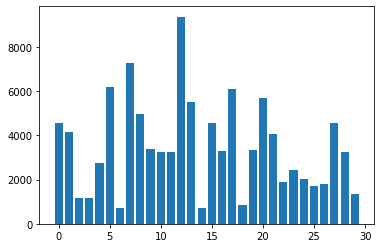

In [8]:
d1.clean_text = d1.clean_text.astype(str)
topics_norm, topic_number, words = NMF_model("all keywords",d1.clean_text, 0.5 , 1 , 30, (1,1))

In [ ]:
words